In [1]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing all applicable libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import platform
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn import preprocessing, mixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.cluster import adjusted_rand_score
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import itertools
from scipy import linalg



message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Tensorflow version={}".format(tf.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=1.0.2
Numpy version=1.21.6
Pandas version=1.3.5
Matplotlib version=3.2.2
Tensorflow version=2.8.2
Python version=3.7.13


**Importing Dataset**

170508288/170498071 [==============================] - 2s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


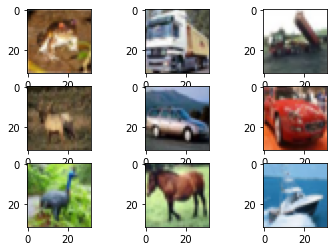

In [3]:
from keras.datasets import cifar10

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
# show the figure
plt.show()

**Fully Connected Neural**

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [5]:
# encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
# flatten 32*32*3 images to a 3072 vector for each image
X_train = X_train.reshape((X_train.shape[0], 32*32*3)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 32*32*3)).astype('float32')

# convert from integers to float and normalize inputs from 0-255 to 0-1 (min-max scaling)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('X_train: ' + str(X_train.shape))
print('X_test:  '  + str(X_test.shape))

X_train: (50000, 3072)
X_test:  (10000, 3072)


In [7]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
y_train[:5]


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

**Model Building**

In [9]:
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [10]:
# encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
# flatten 32*32*3 images to a 3072 vector for each image
X_train = X_train.reshape((X_train.shape[0], 32*32*3)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 32*32*3)).astype('float32')

# convert from integers to float and normalize inputs from 0-255 to 0-1 (min-max scaling)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('X_train: ' + str(X_train.shape))
print('X_test:  '  + str(X_test.shape))

X_train: (50000, 3072)
X_test:  (10000, 3072)


In [12]:
# create model
model = Sequential()
# add the first hidden layer
model.add(Dense(3072, input_shape=(3072,),
                kernel_initializer='normal', activation='relu'))
# add the output layer
model.add(Dense(num_classes,
                kernel_initializer='normal', activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3072)              9440256   
                                                                 
 dense_1 (Dense)             (None, 10)                30730     
                                                                 
Total params: 9,470,986
Trainable params: 9,470,986
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=30, batch_size=200, verbose=1)

Epoch 1/30
250/250 [==============================] - 5s 7ms/step - loss: 3.6559 - accuracy: 0.3011 - val_loss: 1.8253 - val_accuracy: 0.3551
Epoch 2/30
250/250 [==============================] - 1s 6ms/step - loss: 1.7384 - accuracy: 0.3869 - val_loss: 1.6999 - val_accuracy: 0.4015
Epoch 3/30
250/250 [==============================] - 1s 6ms/step - loss: 1.6567 - accuracy: 0.4172 - val_loss: 1.6814 - val_accuracy: 0.3988
Epoch 4/30
250/250 [==============================] - 1s 6ms/step - loss: 1.5966 - accuracy: 0.4349 - val_loss: 1.5795 - val_accuracy: 0.4365
Epoch 5/30
250/250 [==============================] - 1s 6ms/step - loss: 1.5468 - accuracy: 0.4548 - val_loss: 1.5431 - val_accuracy: 0.4585
Epoch 6/30
250/250 [==============================] - 1s 6ms/step - loss: 1.5133 - accuracy: 0.4662 - val_loss: 1.5261 - val_accuracy: 0.4667
Epoch 7/30
250/250 [==============================] - 1s 6ms/step - loss: 1.4696 - accuracy: 0.4834 - val_loss: 1.4775 - val_accuracy: 0.4790
Epoch 

In [14]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Accuracy: 52.50%
Baseline Error: 47.50%


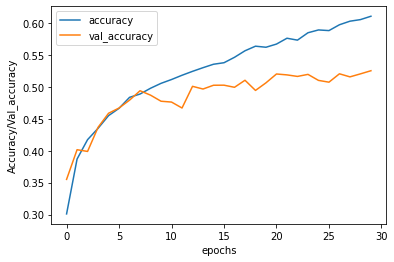

In [15]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy/Val_accuracy")
plt.legend()
plt.show()

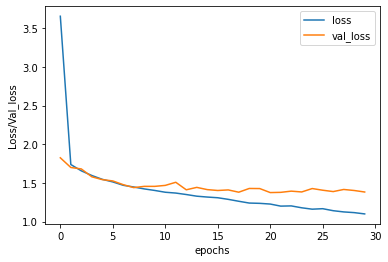

In [16]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("epochs")
plt.ylabel("Loss/Val_loss")
plt.legend()
plt.show()

**Simple CNN Model Building**

In [17]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [50]:
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [19]:
# flatten 32*32*3 images to a 3072 vector for each image
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# convert from integers to float and normalize inputs from 0-255 to 0-1 (min-max scaling)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('X_train: ' + str(X_train.shape))
print('X_test:  '  + str(X_test.shape))

X_train: (50000, 32, 32, 3)
X_test:  (10000, 32, 32, 3)


In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [22]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=64, verbose=1)

Epoch 1/20
782/782 [==============================] - 13s 6ms/step - loss: 1.5941 - accuracy: 0.4150 - val_loss: 1.3284 - val_accuracy: 0.5228
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 1.2384 - accuracy: 0.5570 - val_loss: 1.1717 - val_accuracy: 0.5823
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 1.0826 - accuracy: 0.6181 - val_loss: 1.0795 - val_accuracy: 0.6148
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.9843 - accuracy: 0.6524 - val_loss: 0.9635 - val_accuracy: 0.6597
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.9085 - accuracy: 0.6824 - val_loss: 0.9821 - val_accuracy: 0.6583
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.8511 - accuracy: 0.7034 - val_loss: 0.8914 - val_accuracy: 0.6846
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.8045 - accuracy: 0.7215 - val_loss: 0.8690 - val_accuracy: 0.6932
Epoch

In [23]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Accuracy: 71.74%
Baseline Error: 28.26%


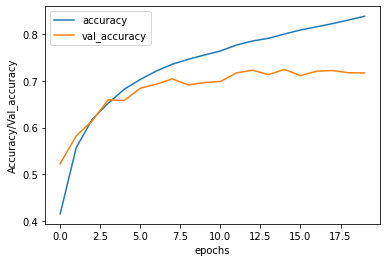

In [24]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy/Val_accuracy")
plt.legend()
plt.show()

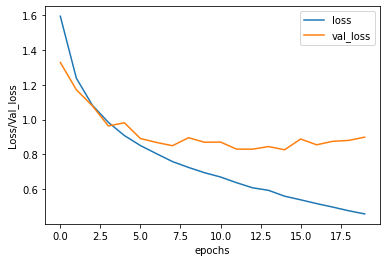

In [25]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("epochs")
plt.ylabel("Loss/Val_loss")
plt.legend()
plt.show()

Fine tuning model

In [80]:
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [81]:
# flatten 32*32*3 images to a 3072 vector for each image
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# convert from integers to float and normalize inputs from 0-255 to 0-1 (min-max scaling)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('X_train: ' + str(X_train.shape))
print('X_test:  '  + str(X_test.shape))

X_train: (50000, 32, 32, 3)
X_test:  (10000, 32, 32, 3)


In [82]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [83]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [84]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=64, verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


782/782 [==============================] - 8s 9ms/step - loss: 1.6736 - accuracy: 0.3814 - val_loss: 1.3440 - val_accuracy: 0.5120
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 1.1846 - accuracy: 0.5745 - val_loss: 0.9955 - val_accuracy: 0.6460
Epoch 3/20
782/782 [==============================] - 7s 8ms/step - loss: 0.9728 - accuracy: 0.6588 - val_loss: 0.8610 - val_accuracy: 0.6957
Epoch 4/20
782/782 [==============================] - 7s 8ms/step - loss: 0.8540 - accuracy: 0.7008 - val_loss: 0.7684 - val_accuracy: 0.7331
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.7667 - accuracy: 0.7310 - val_loss: 0.7023 - val_accuracy: 0.7537
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 0.6989 - accuracy: 0.7547 - val_loss: 0.6814 - val_accuracy: 0.7649
Epoch 7/20
782/782 [==============================] - 7s 8ms/step - loss: 0.6517 - accuracy: 0.7733 - val_loss: 0.7109 - val_accuracy: 0.7583
Epoch 8/20
782/78

In [85]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Accuracy: 80.80%
Baseline Error: 19.20%


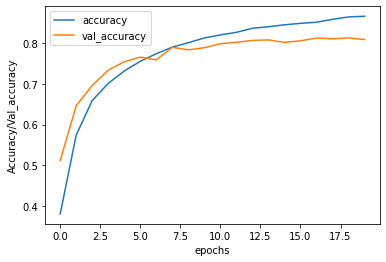

In [86]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy/Val_accuracy")
plt.legend()
plt.show()

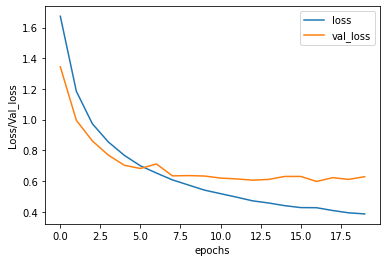

In [87]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("epochs")
plt.ylabel("Loss/Val_loss")
plt.legend()
plt.show()

**Evaluation of the model**

Using Confusion matrix

In [88]:
from sklearn.metrics import confusion_matrix
categories = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

y_pred=model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

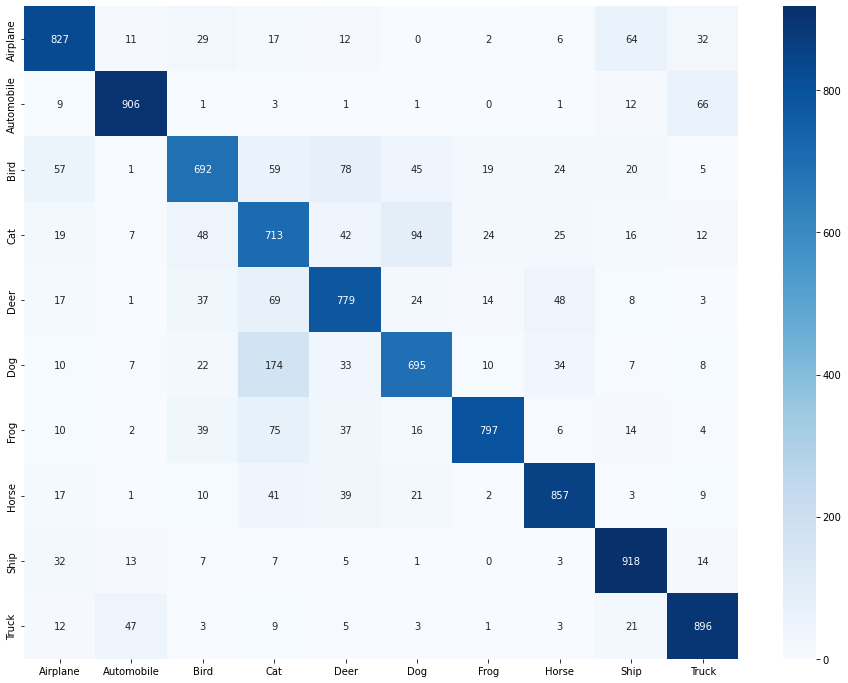

In [98]:
cf_matrix = pd.DataFrame(cm, index= categories, 
                         columns=categories)

f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')